In [3]:
import nltk
import pandas as pd
import sklearn
import re  
from sklearn.feature_extraction.text import CountVectorizer
import csv

In [4]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
## For Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os

import string
import numpy as np


In [5]:
from sklearn.naive_bayes import MultinomialNB

MyModelNB_bern= MultinomialNB()
## When you look up this model, you learn that it wants the 
## !!! DF separate from the labels  !!!

# MyModelNB.fit(TrainDF_nolabels, TrainLabels)
# Prediction = MyModelNB.predict(TestDF)

# ## confusion matrix
# from sklearn.metrics import confusion_matrix
# cnf_matrix = confusion_matrix(TestLabels, Prediction)
# print("\nThe confusion matrix is:")
# print(cnf_matrix)
# print(np.round(MyModelNB.predict_proba(TestDF),2))


In [6]:

filename = "deception_data_two_labels.csv"  

lies = []
reviews = []
sentimentlist = []

with open(filename, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    next(csv_reader)

    
    for row in csv_reader:
        lie, sentiment, review = row[0], row[1], row[2]
        lies.append(lie)
        reviews.append(review)
        sentimentlist.append(sentiment)

print("Lies:", lies)
print("Reviews:", reviews)
print("sentiment",sentimentlist)

Lies: ['f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't']
Reviews: ["'Mike\\'s Pizza High Point", "'i really like this buffet restaurant in Marshall street. they have a lot of selection of american", "'After I went shopping with some of my friend", "'Olive Oil Garden was very disappointing. I expect good food and good service (at least!!) when I go out to eat. The meal was cold when we got it", "'The Seven Heaven restaurant was never known for a superior service but what we experienced last week was a disaster. The waiter would not notice us until we asked him 4 times to bring us the 

In [7]:
vectorizer=CountVectorizer(input='content',
                        stop_words='english',
                        max_features=500,
                          binary=True   )


X = vectorizer.fit_transform(reviews)
ColNames = vectorizer.get_feature_names_out()
df_vector=pd.DataFrame(X.toarray(), columns=ColNames)


In [8]:
df_vector.head()

,10,15,20,2nd,30,5pm,6pm,abc,absolutely,acknowledge,...,worst,worth,wqr,wreck,write,written,xyz,yelp,yesterday,york
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
ColNames

array(['10', '15', '20', '2nd', '30', '5pm', '6pm', 'abc', 'absolutely',
       'acknowledge', 'ago', 'agreed', 'air', 'alfredo', 'amazing',
       'ambiance', 'amer', 'america', 'american', 'appealing',
       'appetizer', 'applebee', 'applebees', 'applied', 'area', 'arrived',
       'asian', 'ask', 'asked', 'ate', 'atmosphere', 'attended',
       'authentic', 'average', 'awesome', 'baby', 'bad', 'bag', 'baked',
       'bakery', 'banana', 'bank', 'bar', 'bean', 'beautiful', 'beef',
       'beer', 'began', 'believe', 'bento', 'best', 'better', 'big',
       'birthday', 'bit', 'bite', 'black', 'bland', 'blanking', 'blast',
       'blend', 'blue', 'blvd', 'boat', 'box', 'bread', 'bring',
       'britain', 'brownie', 'buffalo', 'buffet', 'burger', 'burrata',
       'busy', 'butter', 'cacata', 'cafe', 'cake', 'called', 'calling',
       'came', 'campus', 'carlo', 'carmelized', 'castle', 'caviar',
       'celebrate', 'celebration', 'champagne', 'check', 'checking',
       'cheese', 'chewy',

In [10]:
print(vectorizer.vocabulary_)


{'mike': 268, 'pizza': 318, 'high': 187, 'point': 323, 'really': 342, 'like': 235, 'buffet': 70, 'restaurant': 351, 'marshall': 258, 'street': 410, 'lot': 249, 'selection': 372, 'american': 18, 'went': 484, 'shopping': 381, 'friend': 176, 'olive': 287, 'oil': 286, 'disappointing': 151, 'good': 181, 'food': 172, 'service': 377, 'meal': 260, 'cold': 106, 'seven': 379, 'heaven': 185, 'known': 225, 'superior': 414, 'week': 482, 'disaster': 152, 'waiter': 471, 'notice': 282, 'asked': 28, 'times': 436, 'bring': 66, 'menu': 265, 'exceptional': 164, 'took': 440, 'minutes': 269, 'check': 89, 'spotted': 403, 'finished': 171, 'eating': 161, 'ordering': 293, 'xyz': 496, 'terrible': 428, 'experience': 166, 'yelp': 497, 'appetizer': 20, 'coupon': 122, 'applied': 23, 'checking': 90, 'person': 315, 'serving': 378, 'rude': 361, 'didn': 140, 'acknowledge': 9, 'abc': 7, 'days': 134, 'ago': 10, 'kept': 220, 'waiting': 473, 'hour': 198, 'just': 218, 'seated': 370, 'ordered': 292, 'chilis': 94, 'blvd': 62, 

In [11]:
def Logical_Numbers_Present(anyString):
    return any(char.isdigit() for char in anyString)
##----------------------------------------------------

for nextcol in df_vector.columns:
    #print(nextcol)
    ## Remove unwanted columns
    #Result=str.isdigit(nextcol) ## Fast way to check numbers
    #print(Result)
    
    ##-------------call the function -------
    LogResult=Logical_Numbers_Present(nextcol)
    ## The above returns a logical of True or False
    
    ## The following will remove all columns that contains numbers
    if(LogResult==True):
        #print(LogResult)
        #print(nextcol)
        df_vector=df_vector.drop([nextcol], axis=1)

    ## The following will remove any column with name
    ## of 3 or smaller - like "it" or "of" or "pre".
    ##print(len(nextcol))  ## check it first
    ## NOTE: You can also use this code to CONTROL
    ## the words in the columns. For example - you can
    ## have only words between lengths 5 and 9. 
    ## In this case, we remove columns with words <= 3.
    elif(len(str(nextcol))<=3):
        print(nextcol)
        df_vector=df_vector.drop([nextcol], axis=1)
    
    
print(df_vector)

abc
ago
air
ask
ate
bad
bag
bar
big
bit
box
dal
day
did
die
don
hot
hut
ice
isn
joe
let
lot
new
nyc
oil
omg
par
pay
pub
que
red
rim
san
say
sit
su
tea
tgi
try
tyu
ve
way
wqr
xyz
    absolutely  acknowledge  agreed  alfredo  amazing  ambiance  amer  \
0            0            0       0        0        0         0     0   
1            0            0       0        0        0         0     0   
2            0            0       0        0        0         0     0   
3            0            0       0        0        0         0     0   
4            0            0       0        0        0         0     0   
..         ...          ...     ...      ...      ...       ...   ...   
87           0            0       0        0        1         0     0   
88           0            0       0        0        0         0     0   
89           0            0       0        0        1         0     0   
90           0            0       0        0        0         0     0   
91           0     

In [12]:
df_vector.head()

,absolutely,acknowledge,agreed,alfredo,amazing,ambiance,amer,america,american,appealing,...,world,worse,worst,worth,wreck,write,written,yelp,yesterday,york
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
dflies = df_vector
df_sentiment = df_vector

In [14]:
dflies.insert(loc=0, column='LABEL', value=lies)


In [15]:
dflies.head()

,LABEL,absolutely,acknowledge,agreed,alfredo,amazing,ambiance,amer,america,american,...,world,worse,worst,worth,wreck,write,written,yelp,yesterday,york
0,f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,f,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_sentiment = df_sentiment.drop(columns='LABEL', errors='ignore')

df_sentiment.insert(loc=0, column='LABEL', value=sentimentlist)


In [17]:
df_sentiment.head()

,LABEL,absolutely,acknowledge,agreed,alfredo,amazing,ambiance,amer,america,american,...,world,worse,worst,worth,wreck,write,written,yelp,yesterday,york
0,n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,n,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model for testing lie dataset

In [18]:
from sklearn.model_selection import train_test_split
import random as rd
#rd.seed(1234)
Trainlie, Testlie = train_test_split(dflies, test_size=0.3)
print(Trainlie)
print(Testlie)

   LABEL  absolutely  acknowledge  agreed  alfredo  amazing  ambiance  amer  \
26     t           0            0       0        0        0         0     0   
32     t           0            0       0        0        0         0     0   
15     f           0            0       0        0        0         0     0   
34     t           0            0       0        0        0         0     0   
72     t           0            0       0        0        0         0     0   
..   ...         ...          ...     ...      ...      ...       ...   ...   
85     t           0            0       0        0        0         0     0   
81     t           0            0       0        0        0         0     0   
87     t           0            0       0        0        1         0     0   
25     t           0            0       0        0        0         0     0   
8      f           0            0       0        0        0         0     0   

    america  american  ...  world  worse  worst  wo

In [19]:
Test1Labels=Testlie["LABEL"]
print(Test1Labels)

## remove labels
Testlie = Testlie.drop(["LABEL"], axis=1) #remove the entire column

71    t
64    f
53    f
91    t
57    f
58    f
31    t
66    f
30    t
23    t
52    f
89    t
29    t
61    f
17    f
3     f
39    t
24    t
63    f
49    f
67    f
12    f
77    t
62    f
50    f
21    f
19    f
56    f
Name: LABEL, dtype: object


In [20]:
## TRAIN ----------------------------
Train1Labels=Trainlie["LABEL"]

print(Train1Labels)
## remove labels
Trainlie = Trainlie.drop(["LABEL"], axis=1)

26    t
32    t
15    f
34    t
72    t
     ..
85    t
81    t
87    t
25    t
8     f
Name: LABEL, Length: 64, dtype: object


In [21]:
Trainlie.head()

,absolutely,acknowledge,agreed,alfredo,amazing,ambiance,amer,america,american,appealing,...,world,worse,worst,worth,wreck,write,written,yelp,yesterday,york
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:

from sklearn.metrics import accuracy_score

print(accuracy_score(Test1Labels, Prediction1))

0.39285714285714285


In [24]:
from sklearn.metrics import confusion_matrix

cnf_matrix1 = confusion_matrix(Test1Labels, Prediction1)
print("\nThe confusion matrix \nfor the 500 max word model is:")
print(cnf_matrix1)


The confusion matrix 
for the 500 max word model is:
[[ 5 13]
 [ 4  6]]


# Model for testing sentiment dataset

In [25]:
from sklearn.model_selection import train_test_split
import random as rd
#rd.seed(1234)
TrainDF1, TestDF1 = train_test_split(df_sentiment, test_size=0.3)
print(TrainDF1)
print(TestDF1)

   LABEL  absolutely  acknowledge  agreed  alfredo  amazing  ambiance  amer  \
47     p           0            0       0        0        0         0     0   
26     n           0            0       0        0        0         0     0   
91     p           0            0       1        1        1         1     0   
83     p           0            0       0        0        0         0     0   
65     p           0            0       0        0        0         0     0   
..   ...         ...          ...     ...      ...      ...       ...   ...   
30     n           0            0       0        0        0         0     0   
79     p           0            0       0        0        0         0     0   
20     n           0            0       0        0        0         0     0   
43     n           0            0       0        0        0         0     0   
52     p           0            0       0        0        0         1     0   

    america  american  ...  world  worse  worst  wo

In [26]:
Test2Labels=TestDF1["LABEL"]
print(Test2Labels)

TestDF1 = TestDF1.drop(["LABEL"], axis=1) #remove the entire column

90    p
32    n
60    p
40    n
84    p
27    n
66    p
9     n
88    p
46    p
38    n
5     n
21    n
44    n
64    p
74    p
62    p
89    p
39    n
69    p
7     n
11    n
55    p
4     n
86    p
24    n
37    n
29    n
Name: LABEL, dtype: object


In [27]:
Train2Labels=TrainDF1["LABEL"]
print(Train2Labels)

TrainDF1 = TrainDF1.drop(["LABEL"], axis=1)
print(TrainDF1)

47    p
26    n
91    p
83    p
65    p
     ..
30    n
79    p
20    n
43    n
52    p
Name: LABEL, Length: 64, dtype: object
    absolutely  acknowledge  agreed  alfredo  amazing  ambiance  amer  \
47           0            0       0        0        0         0     0   
26           0            0       0        0        0         0     0   
91           0            0       1        1        1         1     0   
83           0            0       0        0        0         0     0   
65           0            0       0        0        0         0     0   
..         ...          ...     ...      ...      ...       ...   ...   
30           0            0       0        0        0         0     0   
79           0            0       0        0        0         0     0   
20           0            0       0        0        0         0     0   
43           0            0       0        0        0         0     0   
52           0            0       0        0        0         1     0 

In [28]:
from sklearn.naive_bayes import MultinomialNB
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.fit
#Create the modeler
MyModelNB_bern1= MultinomialNB()

 

## Run on all three Dfs.................
NB2=MyModelNB_bern1.fit(TrainDF1, Train2Labels)
Prediction2 = MyModelNB_bern1.predict(TestDF1)
print(Prediction2)
print(np.round(MyModelNB_bern1.predict_proba(TestDF1),2))

MyModelNB_bern1.get_params(deep=True)


['p' 'n' 'p' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'p' 'p' 'p' 'n' 'p'
 'n' 'n' 'n' 'n' 'n' 'n' 'p' 'n' 'p' 'n']
[[0.05 0.95]
 [0.53 0.47]
 [0.19 0.81]
 [0.82 0.18]
 [0.52 0.48]
 [0.84 0.16]
 [0.51 0.49]
 [0.53 0.47]
 [0.66 0.34]
 [0.61 0.39]
 [0.78 0.22]
 [0.99 0.01]
 [0.88 0.12]
 [0.32 0.68]
 [0.02 0.98]
 [0.   1.  ]
 [0.82 0.18]
 [0.07 0.93]
 [0.87 0.13]
 [0.61 0.39]
 [0.98 0.02]
 [0.85 0.15]
 [0.69 0.31]
 [1.   0.  ]
 [0.27 0.73]
 [0.99 0.01]
 [0.44 0.56]
 [0.66 0.34]]


{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [29]:
print(accuracy_score(Test2Labels, Prediction2))

0.6785714285714286


In [30]:
cnf_matrix1 = confusion_matrix(Test2Labels, Prediction2)
print("\nThe confusion matrix \nfor the 500 word model is:")
print(cnf_matrix1)


The confusion matrix 
for the 500 word model is:
[[13  2]
 [ 7  6]]


Lie Indicative Words: ['living', 'dine', 'soup', 'ratastic', 'sauce', 'tgi', 'complimented', 'hotel', 'cool', 'corny', 'price', 'taste', 'lasagna', 'ordered', 'box', 'finished', 'friday', 'time', 'choose', 'salad']
Sentiment Indicative Words: ['like', 'server', 'corny', 'taking', 'took', 'shown', 'marshall', 'taste', 'sound', 'price', 'notice', 'superior', 'cottage', 'friday', 'blvd', 'glass', 'little', 'checking', 'perfection', 'chill']


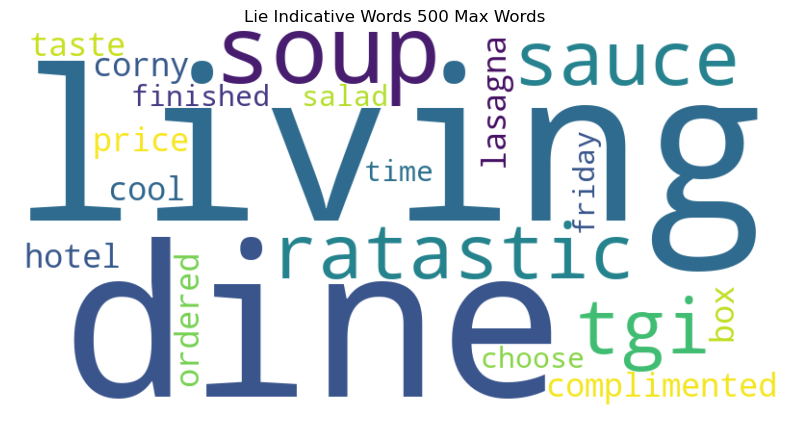

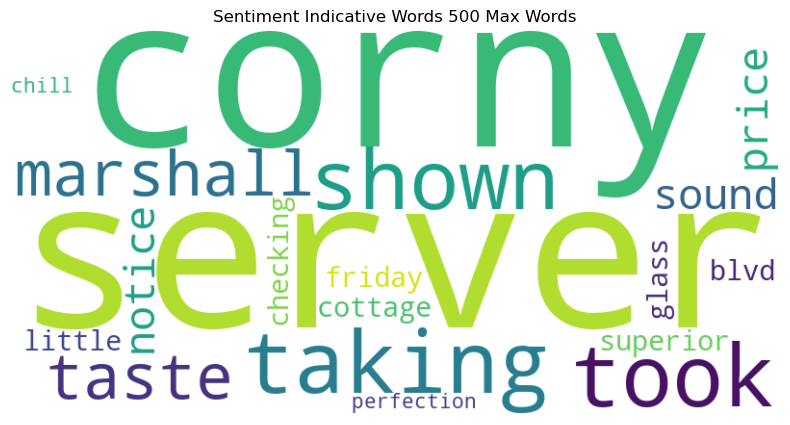

In [31]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
lie_feature_probs = NB1.feature_log_prob_
sentiment_feature_probs = NB2.feature_log_prob_


lie_indicative_words = [ColNames[i] for i in np.argsort(lie_feature_probs[1] - lie_feature_probs[0])[:20]]
sentiment_indicative_words = [ColNames[i] for i in np.argsort(sentiment_feature_probs[1] - sentiment_feature_probs[0])[:20]]


print("Lie Indicative Words:", lie_indicative_words)
print("Sentiment Indicative Words:", sentiment_indicative_words)

def generate_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

generate_wordcloud(lie_indicative_words, "Lie Indicative Words 500 Max Words")
generate_wordcloud(sentiment_indicative_words, "Sentiment Indicative Words 500 Max Words")

